In this file, I try yet again to make a very simple cusp model.  After that, I will try to expand it.  This cusp model will literally be the simplest model possible that also includes dipole tilt.

$\phi_{cusp} = \phi_{0} + \psi$.

Then, I'll build up the model a little bit more and a little bit more etc.

I'll use the Niehoff model for the dipole tilt.  I'll use $phi_{0} = 0.24 rad \sim 78^{\circ}$

Things to consider.  

1.  Datatypes.  Just make everything a np.array()




In [1]:
import tsyganenko as tsyg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacepy import coordinates as coord
import spacepy.time as spt
from spacepy.time import Ticktock
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
import sys
Re = 6371
earth_radius_ax = 1.5*Re #km
#adding the year data here so I don't have to crush my github repo
# one inefficiency i need to address is to get the 
#pathname = '../../data-se3-path-planner/yearData/batch2019/'
# pathname = '../../data-se3-path-planner/yearData/year2019/'
pathname = '../../batch2019/'
sys.path.append(pathname)

[ 6392.78704411  6403.52708915  6414.26713419 ...,  2898.06681573
  2938.11971882  2976.91568793]


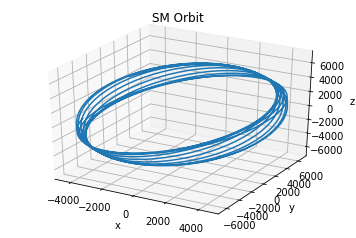

In [2]:
df = pd.read_csv(pathname + 'Jun80_results.csv')
GMAT_MJD_OFFSET = 29999.5
t = df['DefaultSC.A1ModJulian'] + GMAT_MJD_OFFSET
x = df['DefaultSC.gse.X']
y = df['DefaultSC.gse.Y']
z = df['DefaultSC.gse.Z']

tStart= t[0]
tEnd = t[len(t)-1]
tInterval = (t[1]-t[0])/10
t_0 = t
t = np.arange(tStart,tEnd,tInterval)
x = np.interp(t,t_0,x)
y = np.interp(t,t_0,y)
z = np.interp(t,t_0,z)

#
xa = np.array(x)
ya = np.array(y)
za = np.array(z)
print(za)
ta = np.array(t)

c_system = 'SM'
spacecraft = coord.Coords([[i,j,k] for i,j,k in zip(x,y,z)], 'GSE', 'car')
spacecraft.ticks = Ticktock(t,'MJD')
spacecraft = spacecraft.convert('SM','car')
points = 10000
# this figure validates what I already expected
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(spacecraft.x[:points],spacecraft.y[:points],spacecraft.z[:points])
plt.title('SM Orbit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


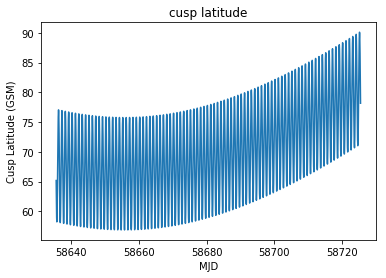

In [3]:
# this is the part where I actually do it

phi_0 = 0.24

psi = tsyg.getTilt(t)
# r = np.linspace(0,10)

# dude if i made a parthenthetical error like this ill be really sad

plt.plot(spacecraft.ticks.MJD, 90 - (phi_0 + psi))
plt.title('cusp latitude')
plt.xlabel('MJD')
plt.ylabel('Cusp Latitude (GSM)')
plt.show()

r equals to [ 1.13295134  1.13292688  1.13294541 ...,  1.11071888  1.11058159
  1.11049225]
[ 0.  0.  0. ...,  0.  0.  0.]


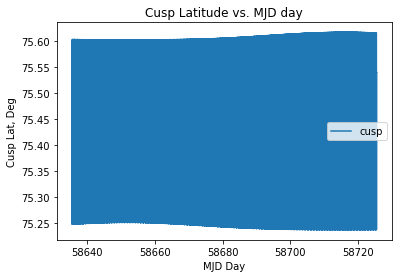

In [4]:
r = np.sqrt(xa**2 + ya**2 + za**2)/Re
print("r equals to",r)
phi_c = np.rad2deg(  np.arcsin((np.sqrt(r))/(np.sqrt(r + (1/np.sin(0.24))**2 - 1)))   ) +psi
#phi = 90-(phi+psi)
lat = 90 - phi_c
lon = np.array(np.zeros(len(spacecraft.ticks.MJD)))
r = np.array(np.ones(len(spacecraft.ticks.MJD)))
# set up cusp location
# i wrote GSM here but i dont see why the plot looks "correct"
cusp_location = coord.Coords([[i,j,k] for i,j,k in zip(r,lat,lon)], 'GSM', 'sph')
cusp_location.ticks = Ticktock(t,'MJD')

#### CUSP LOCATION CONVERSION IS RIGHT HERE BUDDY!!! RIGHT HERE!!!
cusp_location = cusp_location.convert(c_system, 'sph')


print(lon)
plt.plot(t,cusp_location.lati, label='cusp')
plt.legend()
plt.title('Cusp Latitude vs. MJD day')
plt.xlabel('MJD Day')
plt.ylabel('Cusp Lat, Deg')
plt.show()

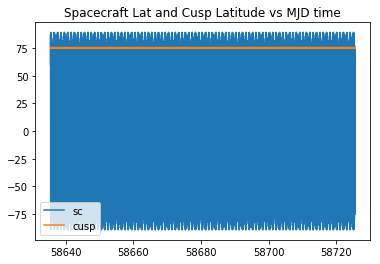

In [5]:
# LATITUDE

#working config SM

#### SPACECRAFT CONVERSION RIGHT HERE BUDDY RIGHT HERE!!!
spacecraft_sm = spacecraft.convert(c_system,'sph')
plt.plot(spacecraft_sm.ticks.MJD, spacecraft_sm.lati,label='sc')
plt.plot(spacecraft_sm.ticks.MJD, cusp_location.lati, label='cusp')
plt.legend()
plt.title('Spacecraft Lat and Cusp Latitude vs MJD time')
plt.show()





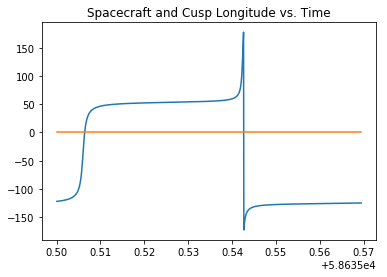

In [6]:
# LONGITUDE

# try to avoid using the [:points] way except for spot checking
# kind of interested in a macro effect
points = 1000
plt.plot(spacecraft_sm.ticks.MJD[:points], spacecraft_sm.long[:points], label='sc')
plt.plot(spacecraft_sm.ticks.MJD[:points], cusp_location.long[:points], label='cusp')
plt.title('Spacecraft and Cusp Longitude vs. Time')
plt.show()

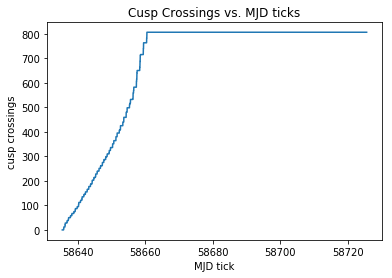

cusp crossings 806


In [7]:
count = []
c = 0
for satlat,cusplat, satlon,cusplon in zip(spacecraft_sm.lati, cusp_location.lati, spacecraft_sm.long, cusp_location.long):
    # 0<=cusplon<180
    if abs(satlat - cusplat)<=4 and abs(satlon-cusplon)<=4:
        # right now i'm using +/- 2 deg for the latitude,
        # and +/- 2 deg for the longitude
        c+=1
        count.append(c)
    else:
        count.append(c)
        
plt.plot(spacecraft_sm.ticks.MJD, count)
plt.xlabel('MJD tick')
plt.ylabel('cusp crossings')
plt.title('Cusp Crossings vs. MJD ticks')
#plt.xlim([58700, 58800])
plt.show()
print("cusp crossings",c)